## Analysis of UK's Tradings for 2014 Trading Year

Task: 
A country's economy depends, sometimes heavily, on its exports and imports. The United Nations Comtrade database provides data on global trade. It will be used to analyse the UK's imports and exports of milk and cream in 2015:

- How much does the UK export and import and is the balance positive (more exports than imports)? 
- Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?
- Which are the regular customers, i.e. which countries buy milk from the UK every month?
- Which countries does the UK both import from and export to?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import *
%matplotlib inline

In [2]:
data=pd.read_csv('comtrade_milk_uk_monthly_14.csv',dtype={'Commodity Code':str})
pd.options.display.max_columns=35
display(data.head(2))

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,2nd Partner Code,2nd Partner,2nd Partner ISO,Customs Proc. Code,Customs,Mode of Transport Code,Mode of Transport,Commodity Code,Commodity,Qty Unit Code,Qty Unit,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,NaN,0,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0401,"Milk and cream, neither concentrated nor sweet...",0,NaN,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,NaN,0,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0401,"Milk and cream, neither concentrated nor sweet...",0,NaN,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0


In [3]:
data['Commodity Code'].value_counts()

0402    872
0401    605
Name: Commodity Code, dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1477.0,2.014000e+03,0.000000e+00,2014.0,2014.0,2014.0,2014.0,2014.0
Period,1477.0,2.014066e+05,3.461807e+00,201401.0,201404.0,201407.0,201410.0,201412.0
Aggregate Level,1477.0,4.000000e+00,0.000000e+00,4.0,4.0,4.0,4.0,4.0
Is Leaf Code,1477.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Trade Flow Code,1477.0,1.756940e+00,4.290765e-01,1.0,2.0,2.0,2.0,2.0
Reporter Code,1477.0,8.260000e+02,0.000000e+00,826.0,826.0,826.0,826.0,826.0
Reporter ISO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner Code,1477.0,4.039655e+02,2.418716e+02,0.0,208.0,381.0,620.0,887.0
Partner ISO,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Partner Code,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def milk_type(code):
    if code=='0401':
        return 'unprocessed'
    if code=='0402':
        return 'processed'
    return 'unknown'


In [6]:
commodity= 'Milk and Cream'
data[commodity]=data['Commodity Code'].apply(milk_type)

In [7]:
data['Milk and Cream'].value_counts()

processed      872
unprocessed    605
Name: Milk and Cream, dtype: int64

In [8]:
data_new=pd.DataFrame(data,columns=['Period','Partner','Milk and Cream','Trade Flow','Trade Value (US$)'])
data_new.tail(5)

,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
1472,201412,United Arab Emirates,processed,Exports,146102
1473,201412,Egypt,processed,Exports,965871
1474,201412,United States of America,processed,Exports,1757
1475,201412,Burkina Faso,processed,Exports,395844
1476,201412,Yemen,processed,Exports,261734


## Question 1

### How much does the UK export and import and is the balance positive (more exports than imports)? 


In [9]:
data_new['Trade Flow'].value_counts()

Exports    1118
Imports     359
Name: Trade Flow, dtype: int64

In [10]:
print(data_new.shape)
data_new.head()

(1477, 5)


,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
0,201401,World,unprocessed,Imports,21950747
1,201401,World,unprocessed,Exports,46923551
2,201401,Afghanistan,unprocessed,Exports,3410
3,201401,Austria,unprocessed,Exports,316
4,201401,Belgium,unprocessed,Imports,4472349


In [11]:
# data_new.Partner.value_counts()

In [12]:
data_new=data_new[data_new['Partner']!='World']
data_new.shape

(1429, 5)

In [13]:
grouped_data=data_new.groupby("Trade Flow")
export_import=pd.DataFrame(grouped_data['Trade Value (US$)'].aggregate(sum))
export_import

,Trade Value (US$)
Trade Flow,
Exports,898651935
Imports,563884942


In [14]:
difference=export_import['Trade Value (US$)'][0]-export_import['Trade Value (US$)'][1]
print(f'The difference between exports and imports is ${difference}')

The difference between exports and imports is $334766993


We see here that there are more exports than imports worth $334766993

<b><i>Answer to question 1:</i><br>

Hence, the UK exports <i>$898651935 and imports $563884942</i> with a positive differnce of $334766993</b>

## Question 2

#### Which are the main trading partners, i.e. from/to which countries does the UK import/export the most?


##### Imports

In [15]:
imports=data_new[data_new['Trade Flow']=='Imports']
print(imports.shape)
imports.head()

(335, 5)


,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
4,201401,Belgium,unprocessed,Imports,4472349
10,201401,Denmark,unprocessed,Imports,2233438
15,201401,France,unprocessed,Imports,1522872
17,201401,Germany,unprocessed,Imports,1028700
23,201401,Ireland,unprocessed,Imports,10676138


In [16]:
grouped_import=imports.groupby('Partner')
grouped_import.head()

,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
4,201401,Belgium,unprocessed,Imports,4472349
10,201401,Denmark,unprocessed,Imports,2233438
15,201401,France,unprocessed,Imports,1522872
17,201401,Germany,unprocessed,Imports,1028700
23,201401,Ireland,unprocessed,Imports,10676138
...,...,...,...,...,...
1175,201409,Austria,processed,Imports,230809
1201,201409,Hungary,processed,Imports,284
1251,201410,Austria,processed,Imports,423018
1291,201410,Latvia,processed,Imports,432


In [17]:
total_imports=grouped_import['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False)
total_imports.head()

Partner
Ireland        174315886
France         105008176
Germany         76612700
Netherlands     72209235
Belgium         58338745
Name: Trade Value (US$), dtype: int64

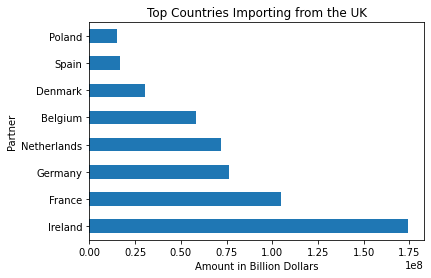

In [19]:
total_imports.head(8).plot(kind='barh')
plt.title("Top Countries Importing from the UK")
plt.xlabel("Amount in Billion Dollars")
plt.savefig("Top Countries Importing from the UK")
plt.show()

We see here that Ireland, France and Germany are the top three countries that import from the UK.

##### Exports

In [21]:
exports_data=data_new[data_new['Trade Flow']=="Exports"]
print(exports_data.shape)
exports_data.head()

(1094, 5)


,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
2,201401,Afghanistan,unprocessed,Exports,3410
3,201401,Austria,unprocessed,Exports,316
5,201401,Belgium,unprocessed,Exports,5663128
6,201401,Br. Virgin Isds,unprocessed,Exports,34566
7,201401,Canada,unprocessed,Exports,51017


In [22]:
grouped_export=exports_data.groupby("Partner")
total_exports=grouped_export['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False)
total_exports.head()

Partner
Ireland        421228441
Algeria         93753841
Netherlands     68649082
Germany         36096633
France          34622982
Name: Trade Value (US$), dtype: int64

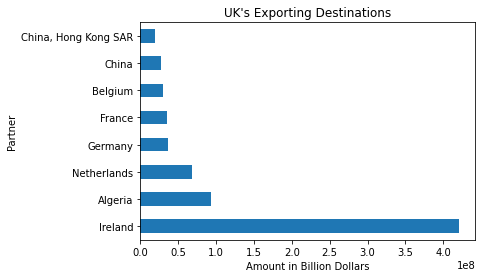

In [23]:
total_exports.head(8).plot(kind='barh')
plt.title("UK's Exporting Destinations")
plt.xlabel("Amount in Billion Dollars")
plt.savefig("UK's Exporting Destinations")
plt.show()

Here, we see that UK's top three export destinations are Ireland, Algeria and The Netherlands.

## Question 3

### Which are the regular customers, i.e. which countries buy milk from the UK every month?


In [87]:
data['Period Desc.'].value_counts()

October 2014      131
December 2014     128
September 2014    126
November 2014     125
May 2014          124
April 2014        124
June 2014         124
January 2014      123
July 2014         123
March 2014        119
February 2014     116
August 2014       114
Name: Period Desc., dtype: int64

We see that there are 12 months listed in this data. So a regular customer buys the both products throughout the months. 

In [100]:
def regular_customer(group):
    return len(group)==24

In [109]:
grouped=exports_data.groupby('Partner')
regular=grouped.filter(regular_customer)
regular[(regular['Period']==201405)&(regular['Milk and Cream']=='unprocessed')]

,Period,Partner,Milk and Cream,Trade Flow,Trade Value (US$)
214,201405,Belgium,unprocessed,Exports,2120867
217,201405,China,unprocessed,Exports,928514
218,201405,Cyprus,unprocessed,Exports,38786
220,201405,Denmark,unprocessed,Exports,156394
224,201405,France,unprocessed,Exports,2266465
226,201405,Germany,unprocessed,Exports,1394273
229,201405,"China, Hong Kong SAR",unprocessed,Exports,509750
230,201405,Hungary,unprocessed,Exports,1579
232,201405,Ireland,unprocessed,Exports,30436121
234,201405,Italy,unprocessed,Exports,2748


In [114]:
percentage_volume=np.round((regular['Trade Value (US$)'].sum() / exports_data['Trade Value (US$)'].sum())*100)
print(f'The volume of trade that Uk gets from her exports is worth {percentage_volume}%')

The volume of trade that Uk gets from her exports is worth 72.0%


We see here that any month and any commodity we take gives the same volume of trade.<br>
Also, we see that this trading volume is about 72%.

## Question 4

### Which countries does the UK both import from and export to?

We check here for where both countries exchange goods by using a pivot table

In [125]:
trading_countries=pivot_table(data_new, index=['Partner'],columns=['Trade Flow'],values='Trade Value (US$)',
                             aggfunc=sum)

In [126]:
print(trading_countries.shape)
trading_countries.head()

(120, 2)


Trade Flow,Exports,Imports
Partner,,
Afghanistan,54524.0,NaN
Algeria,93753841.0,NaN
Angola,13305815.0,NaN
Antigua and Barbuda,78006.0,NaN
Australia,102971.0,NaN


In [122]:
trading_countries.isnull().sum()

Trade Flow
Exports     0
Imports    95
dtype: int64

In [127]:
trading_countries.dropna(inplace=True)
print(trading_countries.shape)
trading_countries.head()

(25, 2)


Trade Flow,Exports,Imports
Partner,,
Austria,136191.0,798816.0
Belgium,29343007.0,58338745.0
Czech Rep.,147573.0,1254989.0
Denmark,2908457.0,30534642.0
Finland,1761424.0,12.0


Here, we see that there are 25 countries where UK share mutual trading relationships.

## CONCLUSION

After analysing the data, we come to the following conclusions about 2014 of UK's trading year.
- The UK does well in her tradings as she records a positive difference of over $334 billion dollars.
- Ireland, France and Germany are the top three countries that import from the UK.
- UK's top three export destinations are Ireland, Algeria and The Netherlands.
- UK's trading volume is about 72%.
- UK shared mutual trading relationships with 25 countries in 2014 trading year.
    